# 1. Importing libraries and Dataframes

# Content List
### 1. Importing libraries and Dataframes
### 2. Create a regional segmentation of the data. 
###### 2.1 Export pie charts
### 3. Create an exclusion flag
### 4. Customer Profiles
###### 4.1 Age flag
###### 4.2 Parents
###### 4.3 Income flag
### 5. Insights based on different customer profiles


In [1]:
# Import analysis libraries

import pandas as pd
import numpy as np
import os

In [2]:
# Import visualisation libraries

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'/Users/zoipisourika/Desktop/Career Foundry/Data Immersion/Achievement 4/Instacart Basket Analysis/02 Data'

In [6]:
# Import dataframe

df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'orders_products_customers.pkl'))

In [8]:
pd.options.display.max_columns = None

In [9]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,Loyalty_flag,average_spend_user,Spending_flag,median_order_freq_user,Order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,7.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


The identifiable columns of first and last name were dropped earlier in the project for data security reasons.

# 2. Create a regional segmentation of the data. 

In [10]:
# Get a list of all the states included in the dataframe

df['state'].value_counts()

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

All states are included

In [25]:
# Create lists for each region

Northeast = ['Maine','New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut','New York', 'Pennsylvania', 'New Jersey']

Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa','Missouri']

South = ['Delaware','Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky','Tennessee','Mississippi','Alabama','Oklahoma', 'Texas','Arkansas','Louisiana']

West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska', 'Washington','Oregon','California','Hawaii']

In [26]:
# Create new Region column

df.loc[df['state'].isin(Northeast),'Region']= 'Northeast'
df.loc[df['state'].isin(Midwest),'Region']= 'Midwest'
df.loc[df['state'].isin(South),'Region']= 'South'
df.loc[df['state'].isin(West),'Region']= 'West'

In [29]:
# Check output
df['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [30]:
# Determine whether there’s a difference in spending habits between the different U.S. regions.

crosstab = pd.crosstab(df['Spending_flag'], df['Region'], dropna = False)

In [31]:
# Check output

crosstab

Region,Midwest,Northeast,South,West
Spending_flag,,,,
High Spender,155975,108225,209691,160354
Low Spender,7441350,5614511,10582194,8132559


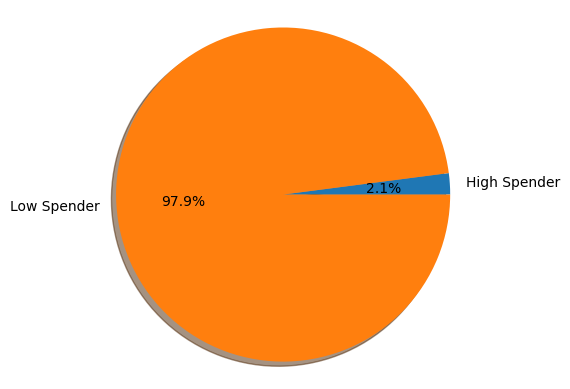

In [33]:
# Pie chart Midwest

labels = 'High Spender', 'Low Spender'
sizes = [155975, 7441350]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True)

ax1.axis('equal')

plt.show()

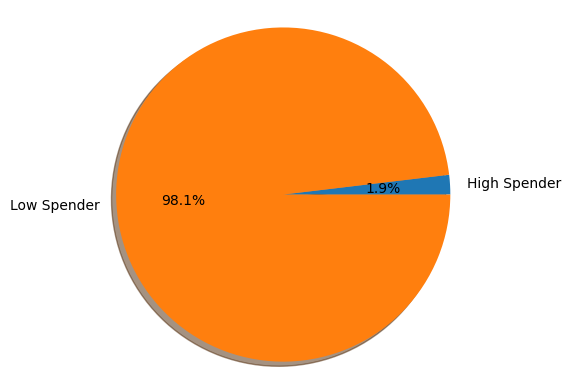

In [34]:
# Pie chart Northeast

labels = 'High Spender', 'Low Spender'
sizes = [108225, 5614511]

fig2, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True)

ax1.axis('equal')

plt.show()

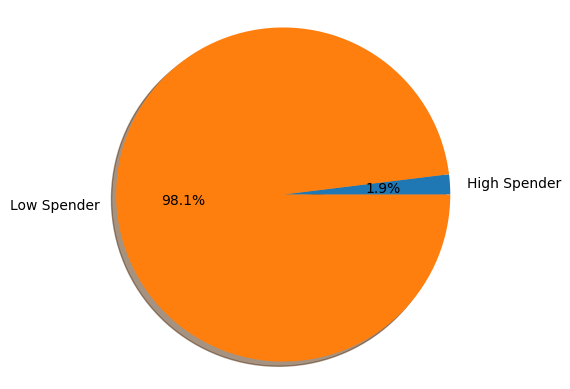

In [36]:
# Pie chart South

labels = 'High Spender', 'Low Spender'
sizes = [209691, 10582194]

fig3, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True)

ax1.axis('equal')

plt.show()

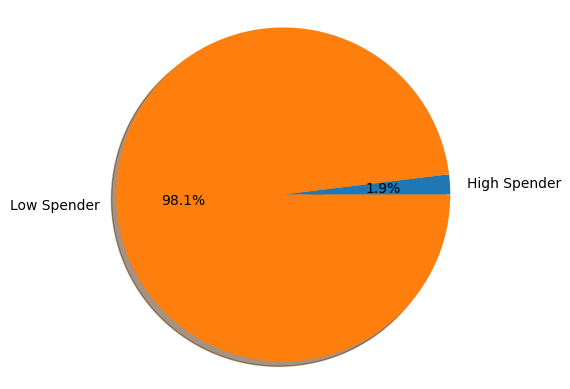

In [37]:
# Pie chart West

labels = 'High Spender', 'Low Spender'
sizes = [160354, 8132559]

fig4, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True)

ax1.axis('equal')

plt.show()

From the above charts it is clear that all regions have a ver similar (almost identical) pattern between high and low spenders.

### 2.1 Export pie charts


In [38]:
path2 = r'/Users/zoipisourika/Desktop/Career Foundry/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualisations'

In [39]:
fig1.figure.savefig(os.path.join(path2, "pie_chart_midwest.png"))

In [40]:
fig2.figure.savefig(os.path.join(path2, "pie_chart_northeast.png"))

In [41]:
fig3.figure.savefig(os.path.join(path2, "pie_chart_south.png"))

In [42]:
fig4.figure.savefig(os.path.join(path2, "pie_chart_west.png"))

# 3. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [43]:
# Create new exclusion flag column

df.loc[df['max_order'] <=5,'Exclusion_flag'] = 'Non_generating'
df.loc[df['max_order'] > 5,'Exclusion_flag'] = 'Generating'


In [44]:
# Check frequency

df['Exclusion_flag'].value_counts(dropna = False)

Generating        30171424
Non_generating     2233435
Name: Exclusion_flag, dtype: int64

In [45]:
# Create new dataframe excluding the non-generating customers

df_2 = df[df['Exclusion_flag'] == 'Generating']

In [47]:
df_2

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,Loyalty_flag,average_spend_user,Spending_flag,median_order_freq_user,Order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,Region,Exclusion_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Generating
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Generating
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Generating
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Generating
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Generating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Least busy,Average orders,26,Regular Customer,10.700000,High Spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,Generating
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Fewest orders,26,Regular Customer,10.700000,High Spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,Generating
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Most orders,26,Regular Customer,10.700000,High Spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,Generating
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Fewest orders,26,Regular Customer,10.700000,High Spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,Generating


In [49]:
# Export df_2

df_2.to_pickle(os.path.join(path, "Prepared Data", "orders_products_all_final.pkl"))

In [58]:
# Departments frequecy of orders average

depts_freq = df_2.groupby('department_id').agg({'order_number' : ['mean']})

In [59]:
#Check output

depts_freq

,order_number
,mean
department_id,
1,16.559281
2,18.545174
3,18.241619
4,18.878740
5,16.511001
6,17.588416
7,18.285281
8,16.387640


In [60]:
# Copy to clipboard

depts_freq.to_clipboard()

### Sampling

In [54]:
np.random.seed(4)
dev = np.random.rand(len(df_2)) <= 0.7

In [55]:
# Split dataframe in two samples

big = df_2[dev]
small = df_2[~dev]

In [56]:
len(df_2)

30171424

In [57]:
len(small)+len(big)

30171424

# 4. Customer Profiles

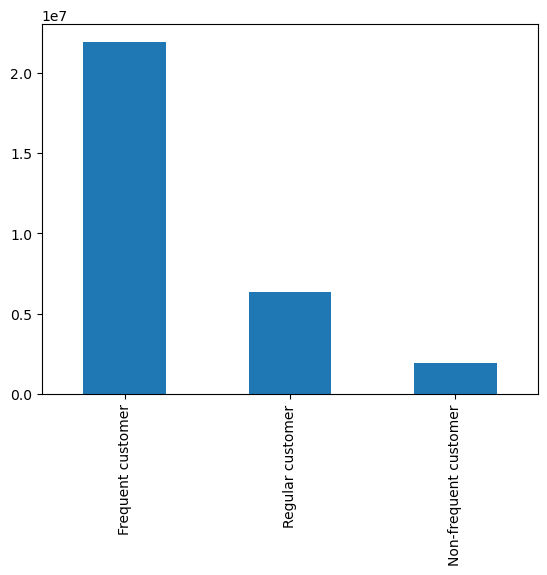

In [64]:
# Brand Loyalty Insights

bar1 = df_2['Order_frequency_flag'].value_counts().plot.bar()

In [65]:
cross_brand = pd.crosstab(df_2['gender'], df_2['Order_frequency_flag'], dropna = False)

In [66]:
cross_brand

Order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
gender,,,
Female,10894972,937662,3156485
Male,11032536,960588,3189181


In [67]:
cross_brand.to_clipboard()

In [68]:
# Family status insights

family_freq = df_2.groupby('fam_status').agg({'order_number' : ['mean']})

In [69]:
family_freq

,order_number
,mean
fam_status,
divorced/widowed,18.384928
living with parents and siblings,18.385719
married,18.166001
single,18.339771


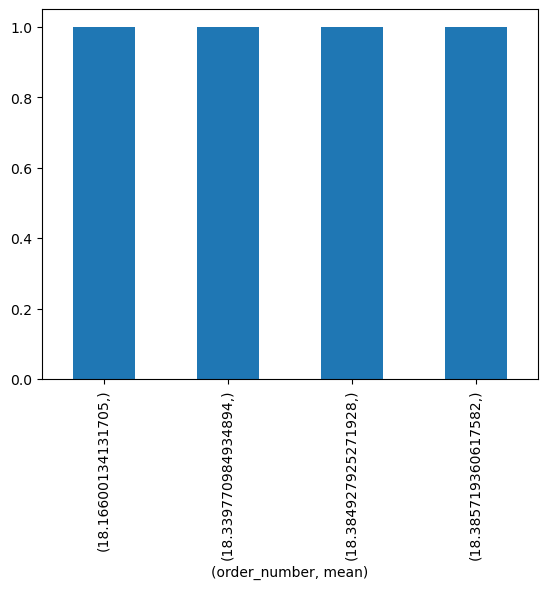

In [72]:
bar_fam = family_freq.value_counts().plot.bar()

## 4.1 Age flag

In [73]:
# Create age flag

df_2.loc[df_2['age'] <=26,'age_flag'] = 'Gen_Z'
df_2.loc[df_2['age'] >=76, 'age_flag'] = 'Silent_Gen'
df_2.loc[(df_2['age'] >=59) & (df_2['age'] <= 76),'age_flag'] = 'Baby_Boomers'
df_2.loc[(df_2['age'] >=43) & (df_2['age'] <= 58),'age_flag'] = 'Gen_X'
df_2.loc[(df_2['age'] >=27) & (df_2['age'] <= 42),'age_flag'] = 'Millennials'

/var/folders/xq/3wlvk7756nj3ym71_4x3pj1r0000gn/T/ipykernel_920/2492796778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['age'] <=26,'age_flag'] = 'Gen_Z'


In [74]:
df_2['age_flag'].value_counts()

Baby_Boomers    8396260
Gen_X           7622148
Millennials     7535630
Gen_Z           4240644
Silent_Gen      2376742
Name: age_flag, dtype: int64

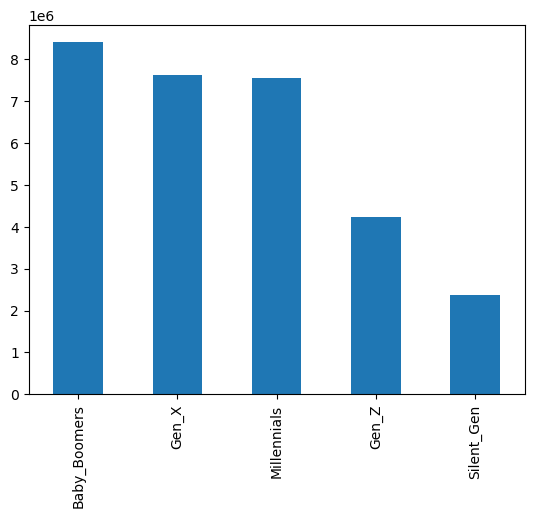

In [76]:
bar_age = df_2['age_flag'].value_counts().plot.bar()

In [77]:
# Export bar chart

bar_age.figure.savefig(os.path.join(path2, "bar_chart_age.png"))

## 4.2 Parents

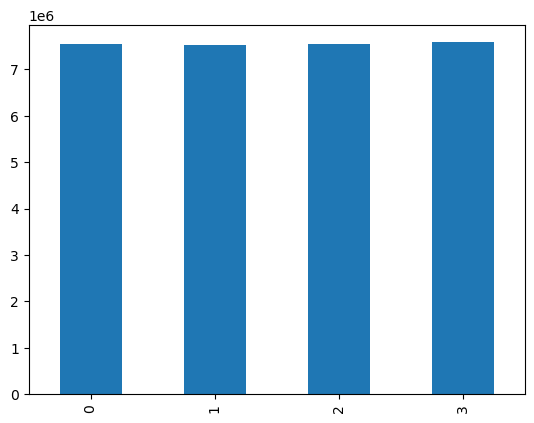

In [81]:
# Distribution of number of dependants

bar_parents = df_2['n_dependants'].value_counts().sort_index().plot.bar()

In [82]:
#Export bar chart

bar_parents.figure.savefig(os.path.join(path2, "bar_chart_parents"))

In [83]:
df_2['n_dependants'].value_counts()

3    7576814
0    7539213
2    7531754
1    7523643
Name: n_dependants, dtype: int64

## 4.3 Income flag

In [87]:
#Create income flag

df_2.loc[df_2['income'] <=60000,'income_flag'] = 'low_income'
df_2.loc[df_2['income'] >100000, 'income_flag'] = 'high_income'
df_2.loc[(df_2['income'] >60000) & (df_2['income'] <= 100000),'income_flag'] = 'middle_income'

/var/folders/xq/3wlvk7756nj3ym71_4x3pj1r0000gn/T/ipykernel_920/4030395709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['income'] <=60000,'income_flag'] = 'low_income'


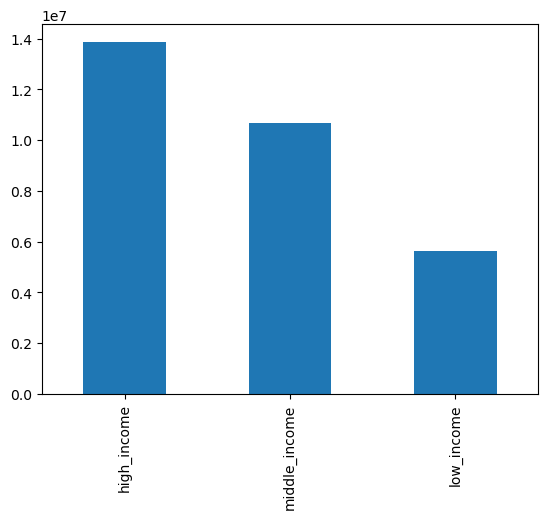

In [91]:
bar_income = df_2['income_flag'].value_counts().plot.bar()

# 5. Insights based on different customer profiles

In [92]:
df_2

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,Loyalty_flag,average_spend_user,Spending_flag,median_order_freq_user,Order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,Region,Exclusion_flag,age_flag,income_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Generating,Millennials,low_income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Generating,Millennials,low_income
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Generating,Millennials,low_income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Generating,Millennials,low_income
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Generating,Millennials,low_income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Least busy,Average orders,26,Regular Customer,10.700000,High Spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,Generating,Gen_Z,low_income
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Fewest orders,26,Regular Customer,10.700000,High Spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,Generating,Gen_Z,low_income
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Most orders,26,Regular Customer,10.700000,High Spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,Generating,Gen_Z,low_income
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Fewest orders,26,Regular Customer,10.700000,High Spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,Generating,Gen_Z,low_income


In [109]:
crosstab_income = pd.crosstab(df_2['income_flag'], df_2['Spending_flag'], dropna = False)

In [110]:
crosstab_income

Spending_flag,High Spender,Low Spender
income_flag,,
high_income,512378,13351267
low_income,11497,5612756
middle_income,63453,10620073


In [111]:
crosstab_income2 = pd.crosstab(df_2['income_flag'], df_2['Order_frequency_flag'], dropna = False)

In [112]:
crosstab_income2

Order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_flag,,,
high_income,10126837,839875,2896933
low_income,4000538,409639,1214076
middle_income,7800133,648736,2234657


In [113]:
crosstab_income3 = pd.crosstab(df_2['income_flag'], df_2['Region'], dropna = False)

In [114]:
crosstab_income3

Region,Midwest,Northeast,South,West
income_flag,,,,
high_income,3315516,2457212,4552410,3538507
low_income,1299324,987527,1907746,1429656
middle_income,2455282,1879612,3590003,2758629


In [116]:
crosstab_loyalty = pd.crosstab(df_2['Loyalty_flag'], df_2['Order_frequency_flag'], dropna = False)

In [117]:
crosstab_loyalty

Order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
Loyalty_flag,,,
Loyal Customer,10281575,0,2518
New Customer,1379238,1237475,1393842
Regular Customer,10266695,660775,4949306


In [119]:
crosstab_loyalty2 = pd.crosstab(df_2['Loyalty_flag'], df_2['age_flag'], dropna = False)

In [120]:
crosstab_loyalty2

age_flag,Baby_Boomers,Gen_X,Gen_Z,Millennials,Silent_Gen
Loyalty_flag,,,,,
Loyal Customer,2863405,2614850,1436620,2558484,810734
New Customer,1126070,1010740,561841,995210,316694
Regular Customer,4406785,3996558,2242183,3981936,1249314


In [121]:
crosstab_family = pd.crosstab(df_2['fam_status'], df_2['Spending_flag'], dropna = False)

In [122]:
crosstab_family

Spending_flag,High Spender,Low Spender
fam_status,,
divorced/widowed,49316,2528564
living with parents and siblings,27295,1416786
married,418144,20769986
single,92573,4868760


In [123]:
crosstab_family2 = pd.crosstab(df_2['fam_status'], df_2['order_hour_of_day'], dropna = False)

In [124]:
crosstab_family2

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
fam_status,,,,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,15748,8347,6045,4292,3910,7500,23148,75950,139507,195332,218986,216448,206506,210509,213067,211636,201958,163535,127013,101363,79210,64708,50650,32512
living with parents and siblings,10368,5411,3409,2462,2616,4208,14451,41544,74470,108323,124053,122266,116185,119743,119424,118122,112349,92931,72168,55741,42629,34671,28344,18193
married,141536,74734,44033,32769,34884,57431,191950,588907,1143709,1627038,1825110,1790977,1709962,1738205,1758278,1730121,1640501,1350131,1062513,812174,635529,523647,414143,259848
single,34295,17511,10263,7597,8034,13101,46556,140034,267711,382202,421100,418987,397051,402010,409611,408027,391220,318754,244387,188914,148904,121651,99779,63634


Married people place most orders at 10 AM.